In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
x,y = datasets.load_iris(return_X_y=True)

In [4]:
import pandas as pd

In [5]:
x = pd.DataFrame(x,columns=iris.feature_names)
y = pd.DataFrame(y,columns=['target'])
df = pd.concat([x,y],axis=1)

In [6]:
df.target = df.target.astype(str)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data cleaning 

In [8]:
import dabl
clean_df = dabl.clean(df,verbose=2)

Detected feature types:
4 float, 0 int, 1 object, 0 date, 0 other
Interpreted as:
continuous      5
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     0
useless         0
dtype: int64


# Preprocessing

In [9]:
ep = dabl.EasyPreprocessor().fit(x,y)

In [10]:
ep.ct_

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.1,
                  transformer_weights=None,
                  transformers=[('continuous',
                                 Pipeline(memory=None,
                                          steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
      

# Simple Prototypes

In [11]:
from dabl import SimpleClassifier
SimpleClassifier().fit(df,target_col='target')

Running DummyClassifier(strategy='prior')
accuracy: 0.333 recall_macro: 0.333 precision_macro: 0.111 f1_macro: 0.167
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.333 recall_macro: 0.333 precision_macro: 0.111 f1_macro: 0.167

Running GaussianNB()
accuracy: 0.953 recall_macro: 0.953 precision_macro: 0.958 f1_macro: 0.953
=== new best GaussianNB() (using recall_macro):
accuracy: 0.953 recall_macro: 0.953 precision_macro: 0.958 f1_macro: 0.953

Running MultinomialNB()
accuracy: 0.793 recall_macro: 0.793 precision_macro: 0.802 f1_macro: 0.790
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.667 recall_macro: 0.667 precision_macro: 0.500 f1_macro: 0.556
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.960 recall_macro: 0.960 precision_macro: 0.962 f1_macro: 0.960
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=5) (using recall_macro):
accuracy: 0.960 recall_macro: 0.960

SimpleClassifier(random_state=None, refit=True, verbose=1)

# Automatic Model Search

In [12]:
from dabl.models import AnyClassifier
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df)
ac = AnyClassifier().fit(df_train,target_col='target')

best classifier:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best score: 0.967


# Model Explanation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

[[12  0  0]
 [ 0 11  2]
 [ 0  1 12]]


C:\Users\flyod\Anaconda3\lib\site-packages\dabl\explain.py:31: UserWarning: Can't plot roc curve, install sklearn 0.22-dev
  warn("Can't plot roc curve, install sklearn 0.22-dev")


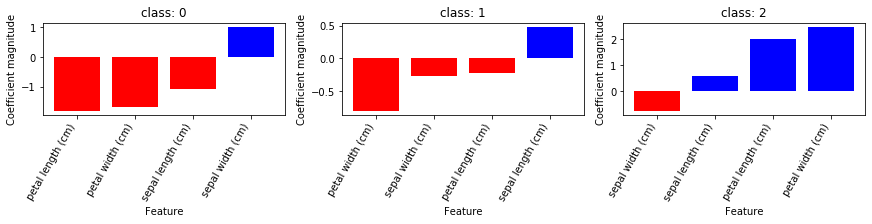

In [13]:
dabl.explain(ac,X_val=df_test,target_col='target')

# Prediction

In [14]:
ac.predict(x.sample(10))

array(['0', '2', '1', '0', '2', '2', '1', '2', '0', '2'], dtype=object)